<a href="https://colab.research.google.com/github/M3thsara/M3thsara-Image-Processing-and-Machine-Vision/blob/A01-Intensity-Transformations-and-Neighborhood-Filtering/A01_Intensity_Transformations_and_Neighborhood_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Intensity Transformation**

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


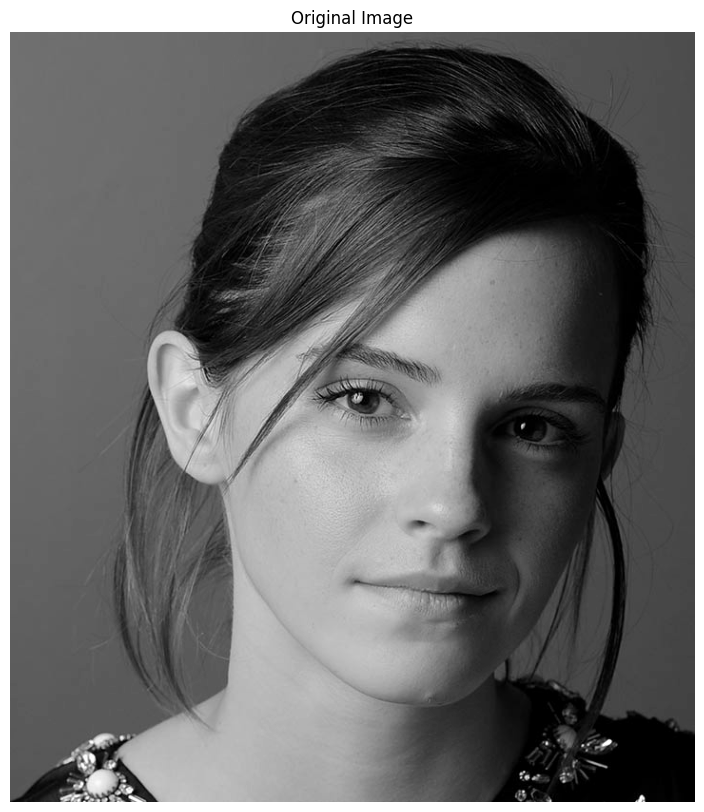

In [10]:
import cv2 as cv     #open opencv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('/content/drive/MyDrive/Images - EN3160 IPMV/a1images/emma.jpg',cv.IMREAD_GRAYSCALE)
assert image is not None

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Original Image')
plt.imshow(image, cmap='gray')
ax.axis('off')
plt.show()

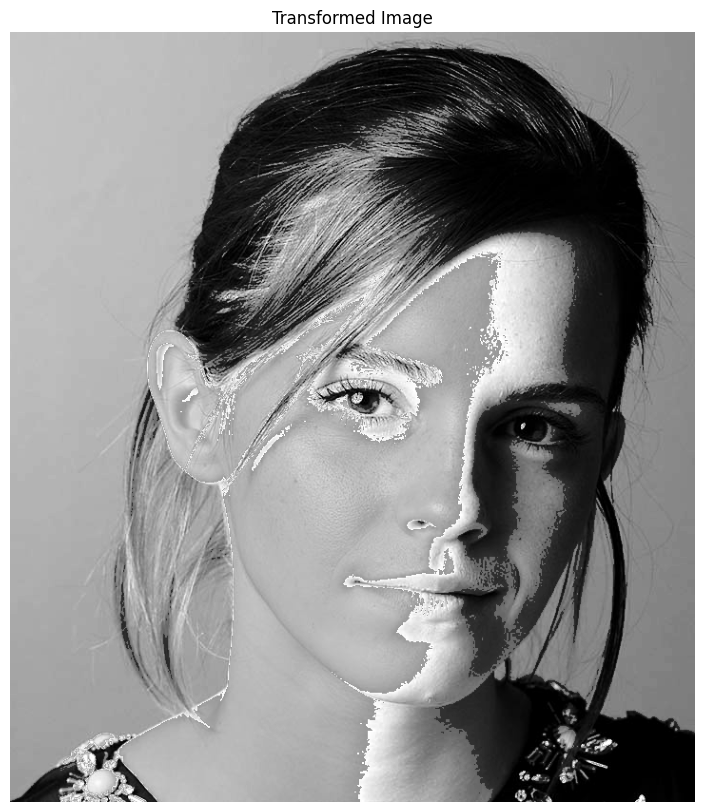

In [9]:
# Define the intensity transformation function based on line equations

def intensity_transformation(pixel_value):

    if 0 <= pixel_value <= 50:
        return pixel_value                                                      # y = x for 0 <= x <= 50

    elif 50 < pixel_value <= 150:
        return 1.55 * pixel_value + 22.5                                        # y = 1.55x + 22.5  for 50 < x <= 150

    elif 150 < pixel_value <= 255:
        return pixel_value                                                      # y = x for  150 < x <= 255

# Create an empty array (same size as the image) to store the transformed pixel values.

transformed_image = np.zeros(image.shape, dtype=np.uint8)

# Loop through every pixel in the image and apply the transformation

for i in range(image.shape[0]):                                                 # Loop over the image rows
    for j in range(image.shape[1]):                                             # Loop over the image columns
        transformed_image[i, j] = intensity_transformation(image[i, j])

# Show the transformed image

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Transformed Image')
plt.imshow(transformed_image, cmap='gray')
ax.axis('off')
plt.show()
